# Prediction in Minutes
In this file we will look at a few regressors from Sklearn and how they help us predict the delay of the flight in minutes. 

#### Objectives
1. Reading the file.
2. Only looking at those data points where the flight was late.
3. Splitting the dataset to train and test data.
3. Fit a few models and look at a few metrics for our predicted values.

The different Regressors we use in this file are
1. Linear Regressor [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. Extra trees Regressor [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)
3. XGboost Regressor [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
4. Random Forest Regressor [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

#### Scope
With knowing the flight delay in minutes we can try to move the schedule of the other flights and hence make sure subsequent flights are not delayed.

#### Reading the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Looking at the dataframe once
df = pd.read_csv("Data/Merged_Flight_Weather.csv", index_col = 0)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,741.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,821.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,754.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,740.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,742.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA


In [3]:
# Checking if there are any missing values
df.isnull().sum()

index_x            0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
DeptTime           0
index_y            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
dtype: int64

### Label Encoding using cat.codes
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Here we are label encoding the `Origin` and the `airport` features, by first converting them to category type and then using `cat.codes`

In [4]:
df["Origin"] = df["Origin"].astype('category')
df["airport"] = df["airport"].astype('category')
df["Dest"] = df["Dest"].astype('category')
# To see if our features have convered to category
df.dtypes

index_x               int64
ArrDel15            float64
ArrDelayMinutes     float64
ArrTime             float64
CRSArrTime            int64
CRSDepTime            int64
DayofMonth            int64
DepDel15            float64
DepDelayMinutes     float64
DepTime             float64
Dest               category
DestAirportID         int64
FlightDate           object
Month                 int64
Origin             category
OriginAirportID       int64
Quarter               int64
Year                  int64
DeptTime              int64
index_y               int64
windspeedKmph         int64
winddirDegree         int64
weatherCode           int64
precipMM            float64
visibility            int64
pressure              int64
cloudcover            int64
DewPointF             int64
WindGustKmph          int64
tempF                 int64
WindChillF            int64
humidity              int64
time                  int64
date                 object
airport            category
dtype: object

As you can see those both Origin and airport have been converted into category type

In [5]:
df["Origin"] = df["Origin"].cat.codes
df["airport"] = df["airport"].cat.codes
df["Dest"] = df["Dest"].cat.codes
df.head()

,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,741.0,...,1030,0,23,8,34,29,65,800,2016-01-01,13
1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,821.0,...,1030,0,23,8,34,29,65,800,2016-01-01,13
2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,754.0,...,1030,0,23,8,34,29,65,800,2016-01-01,13
3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,740.0,...,1030,0,23,8,34,29,65,800,2016-01-01,13
4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,742.0,...,1030,0,23,8,34,29,65,800,2016-01-01,13


In [6]:
df.dtypes

index_x              int64
ArrDel15           float64
ArrDelayMinutes    float64
ArrTime            float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                  int8
DestAirportID        int64
FlightDate          object
Month                int64
Origin                int8
OriginAirportID      int64
Quarter              int64
Year                 int64
DeptTime             int64
index_y              int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
time                 int64
date                object
airport               int8
dtype: object

In [7]:
df.Origin.value_counts()

8     209321
14    166932
11    153438
0     146723
2     144149
7     132154
3     125904
13    115707
12    114012
4     100170
9      99568
6      93436
5      89551
1      83486
10     76540
Name: Origin, dtype: int64

In [8]:
df.airport.value_counts()

8     209321
14    166932
11    153438
0     146723
2     144149
7     132154
3     125904
13    115707
12    114012
4     100170
9      99568
6      93436
5      89551
1      83486
10     76540
Name: airport, dtype: int64

In [9]:
df = df.drop(columns = ['index_x', 'FlightDate', 'date', 'time', 'Year', 'index_y', 
                        'ArrTime', 'DeptTime', 'airport'], axis = 1)

In [10]:
df.columns

Index(['ArrDel15', 'ArrDelayMinutes', 'CRSArrTime', 'CRSDepTime', 'DayofMonth',
       'DepDel15', 'DepDelayMinutes', 'DepTime', 'Dest', 'DestAirportID',
       'Month', 'Origin', 'OriginAirportID', 'Quarter', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'humidity'],
      dtype='object')

Another way for label encoding is to use `sklearn.preprocessing.LabelEncoder` : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

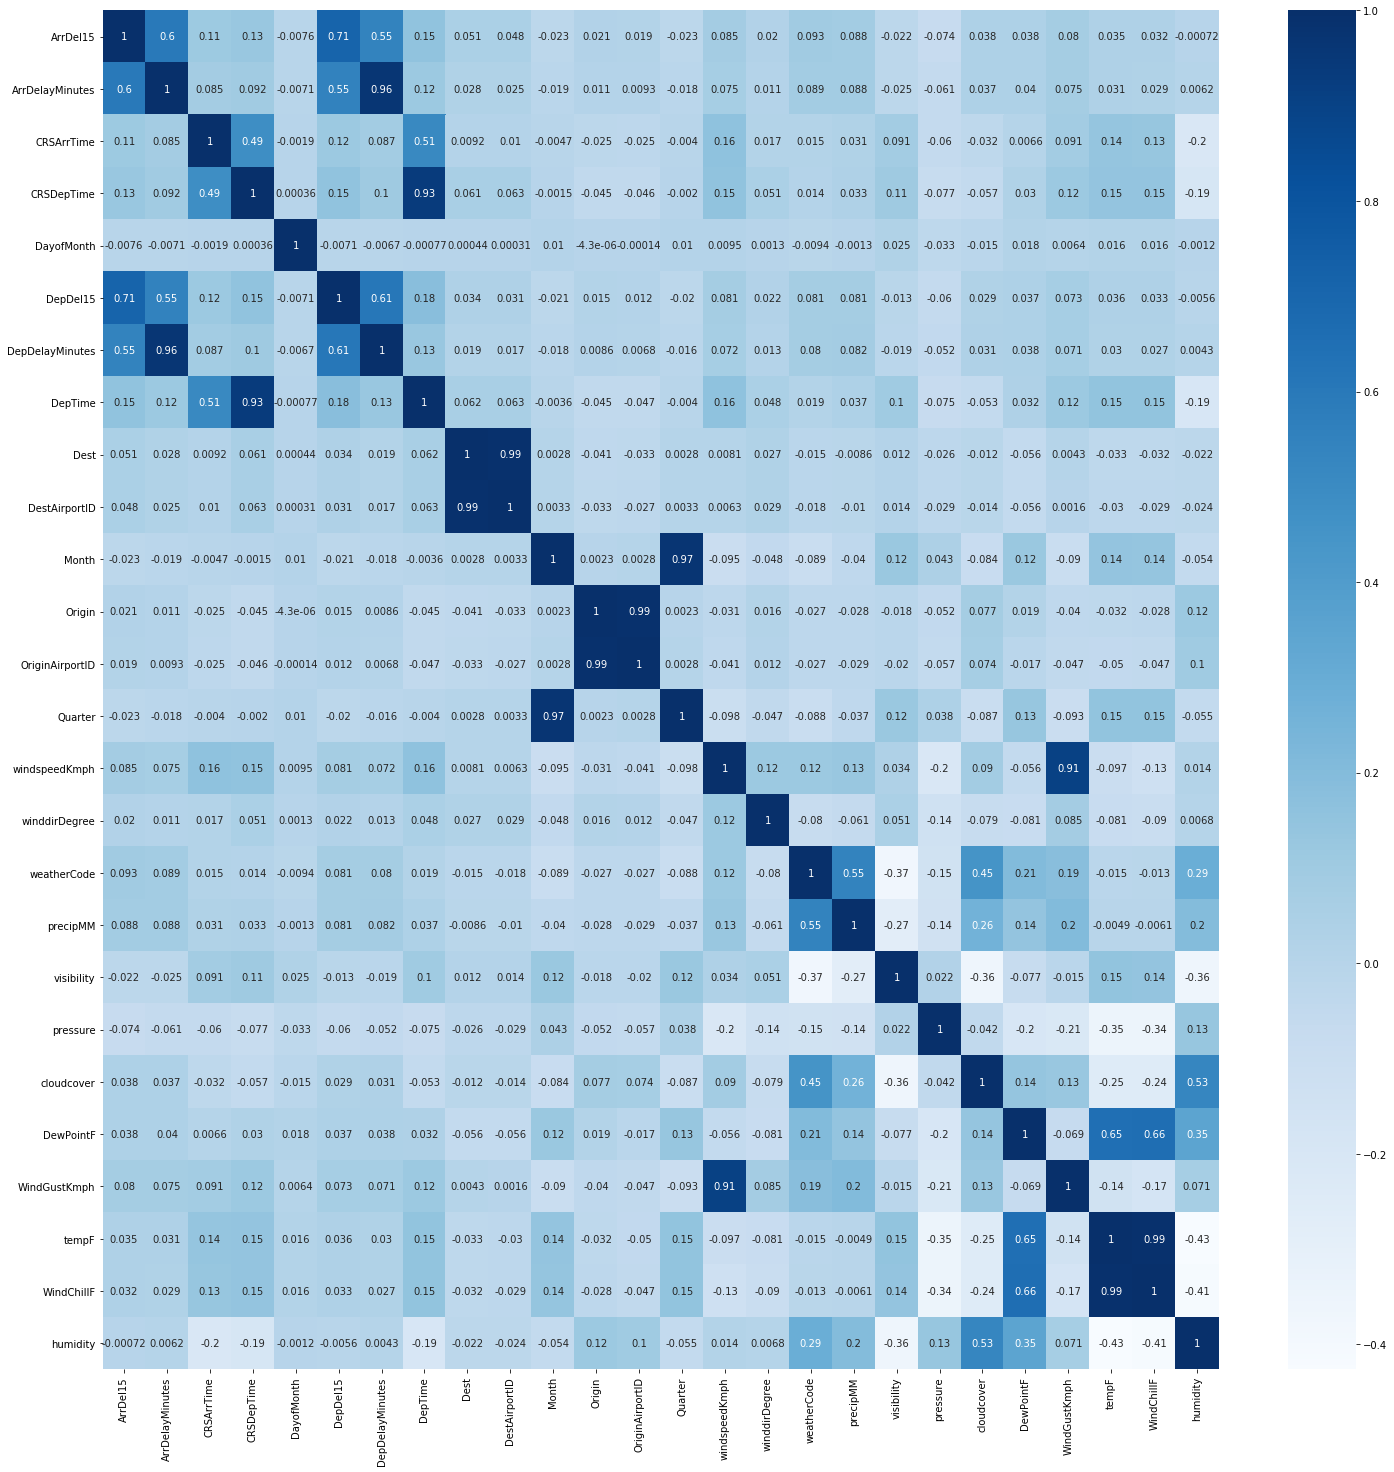

In [11]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

#### Filtering the data
We will only be looking at those flights which arrived late because it will be redundant to predict the delay in muntes for flights that have not arrived late.

In [12]:
# Looking at only those flights that arrived late
temp = df[df.ArrDel15 == 1.0]
y = temp['ArrDelayMinutes']
X = temp.drop(columns = ['ArrDelayMinutes', 'ArrDel15'])

In [13]:
# Looking at the features
X.columns

Index(['CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [14]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291000, 24), (97000, 24), (291000,), (97000,))

### Metrics used
To evaluvate our model we will be looking at a few metrics, namely

1. Mean Absolute Error  (MAE): Mean absolute error is a measure of errors between paired observations expressing the same phenomenon.

$$MAE = \frac{1}{n}\sum \limits _{i=1} ^{n} |y_{i} - \hat{y}| $$

2. Mean Squared Error(MSE): The mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

$$MSE = \frac{1}{N}\sum \limits _{i=1} ^{n} (y_{i} - \hat{y})^2 $$

3. Root Mean Squared Error (RMSE) : Essentially the root of MSE

$$RMSE = \sqrt{\frac{1}{N}\sum \limits _{i=1} ^{n} (y_{i} - \hat{y})^2} $$


4. Coefficient of Determination ($ R^2 $): The coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable.

$${R^2} = \frac{VAR(X, Y)_(fitted line)}{VAR(X, Y)mean}$$

# Prediction

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred_linear_regression = linear_regressor.predict(X_test)

In [17]:
import sklearn.metrics as metrics
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_linear_regression) 
MSE=metrics.mean_squared_error(y_test, y_pred_linear_regression) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_linear_regression)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 12.26892560149867
MSE: 312.65662684535033
RMSE: 17.68209905088619
R-Squared: 0.9413513303662036


## Extra trees Regressor

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees_regressor = ExtraTreesRegressor()
extra_trees_regressor.fit(X_train,y_train)
y_pred_extra_trees = extra_trees_regressor.predict(X_test)

In [19]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_extra_trees) 
MSE=metrics.mean_squared_error(y_test, y_pred_extra_trees) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_extra_trees)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.92967994845361
MSE: 294.6468895904639
RMSE: 17.16528151794965
R-Squared: 0.9447296279609504


## XGboost Regressor

In [20]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train,y_train)
y_pred_xgboost = xgboost_regressor.predict(X_test)

In [21]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_xgboost) 
MSE=metrics.mean_squared_error(y_test, y_pred_xgboost) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_xgboost)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.309966926230597
MSE: 271.1140990359243
RMSE: 16.46554277987593
R-Squared: 0.9491439494251079


## Random forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)
y_pred_random_forest = random_forest_regressor.predict(X_test)

In [23]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_random_forest) 
MSE=metrics.mean_squared_error(y_test, y_pred_random_forest) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_random_forest)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.846254423171333
MSE: 290.44214724345824
RMSE: 17.042363311567392
R-Squared: 0.9455183607867758


## Results for Regression models

|MODEL                          |Mean Absolute Error | Root Mean Squared Error | R^2     |
|-------------------------------|--------------------|-------------------------|---------|
|Linear Regressor               | 12.2689            | 17.6820                 |0.94135  |
|Extra Trees Regressor          | 11.9296            | 17.1652                 |0.94472  |
|XgBoost Regressor              | 11.3099            | 16.4655                 |0.94914  |
|Random Forest Regressor        | 11.8462            | 17.0423                 |0.94551  |